# CSE488 Lab Mini Project: Course Advising Dataset

### Set Up

Let's setup Spark on your Colab environment.  Run the cell below!

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive2
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u432-ga~us1-0ubuntu2~22.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u432-ga~us1-0ub

In [ ]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

### Data Load
using --id download the files needed for the Assignment.

In [ ]:
!gdown --id 1zvCGL4BEHwuJlu6SnXvE502wTYZin3pg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zvCGL4BEHwuJlu6SnXvE502wTYZin3pg
To: /content/Course_Advising_shuffled_file.xlsx
100% 166k/166k [00:00<00:00, 68.0MB/s]


### Data Description

Converting excel file to csv format

In [ ]:
df = pd.read_excel('/content/Course_Advising_shuffled_file.xlsx')
df.to_csv('/content/Course_Advising_shuffled_file.csv', index=False)

In [ ]:
# courses = spark.read.option('header', 'true').csv('/content/Course_Advising_shuffled_file.csv')
courses = spark.createDataFrame(df)
courses.show()

+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|StudentId|CreditsCompleted|takencredit|takennocourse|    C1|    C2|    C3|    C4|    C5| C6| C7|
+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|        1|            29.5|       14.5|            4|CSE110|ECO101|MAT205|PHY109|   NaN|NaN|NaN|
|        2|            41.0|       14.0|            4|CSE207|CSE209|MAT205|PHY209|   NaN|NaN|NaN|
|        3|            17.5|       17.5|            5|CSE110|ENG102|MAT102|MAT104|PHY109|NaN|NaN|
|        4|            44.5|       13.5|            4|CSE110|GEN203|MAT101|MAT205|   NaN|NaN|NaN|
|        5|            82.0|        4.0|            1|CSE303|   NaN|   NaN|   NaN|   NaN|NaN|NaN|
|        6|             0.0|       14.5|            4|CHE109|CSE103|CSE106|ENG101|   NaN|NaN|NaN|
|        7|            27.5|       17.5|            5|CSE110|ECO101|MAT104|STA102|CSE209|NaN|NaN|
|        8|         

In [ ]:
courses.printSchema()

root
 |-- StudentId: long (nullable = true)
 |-- CreditsCompleted: double (nullable = true)
 |-- takencredit: double (nullable = true)
 |-- takennocourse: long (nullable = true)
 |-- C1: string (nullable = true)
 |-- C2: string (nullable = true)
 |-- C3: string (nullable = true)
 |-- C4: string (nullable = true)
 |-- C5: string (nullable = true)
 |-- C6: string (nullable = true)
 |-- C7: string (nullable = true)



In [ ]:
courses = courses.na.drop(how="all")

In [ ]:
courses.show(10)

+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|StudentId|CreditsCompleted|takencredit|takennocourse|    C1|    C2|    C3|    C4|    C5| C6| C7|
+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|        1|            29.5|       14.5|            4|CSE110|ECO101|MAT205|PHY109|   NaN|NaN|NaN|
|        2|            41.0|       14.0|            4|CSE207|CSE209|MAT205|PHY209|   NaN|NaN|NaN|
|        3|            17.5|       17.5|            5|CSE110|ENG102|MAT102|MAT104|PHY109|NaN|NaN|
|        4|            44.5|       13.5|            4|CSE110|GEN203|MAT101|MAT205|   NaN|NaN|NaN|
|        5|            82.0|        4.0|            1|CSE303|   NaN|   NaN|   NaN|   NaN|NaN|NaN|
|        6|             0.0|       14.5|            4|CHE109|CSE103|CSE106|ENG101|   NaN|NaN|NaN|
|        7|            27.5|       17.5|            5|CSE110|ECO101|MAT104|STA102|CSE209|NaN|NaN|
|        8|         

In [ ]:
courses.createOrReplaceTempView("Courses")
# query to accept only values which are not null
query = """ SELECT *
            FROM Courses
            WHERE C7 IS NOT NULL and CreditsCompleted < 113
        """

courses_demo = spark.sql(query)

In [ ]:
courses_demo.show()

+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|StudentId|CreditsCompleted|takencredit|takennocourse|    C1|    C2|    C3|    C4|    C5| C6| C7|
+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+
|        1|            29.5|       14.5|            4|CSE110|ECO101|MAT205|PHY109|   NaN|NaN|NaN|
|        2|            41.0|       14.0|            4|CSE207|CSE209|MAT205|PHY209|   NaN|NaN|NaN|
|        3|            17.5|       17.5|            5|CSE110|ENG102|MAT102|MAT104|PHY109|NaN|NaN|
|        4|            44.5|       13.5|            4|CSE110|GEN203|MAT101|MAT205|   NaN|NaN|NaN|
|        5|            82.0|        4.0|            1|CSE303|   NaN|   NaN|   NaN|   NaN|NaN|NaN|
|        6|             0.0|       14.5|            4|CHE109|CSE103|CSE106|ENG101|   NaN|NaN|NaN|
|        7|            27.5|       17.5|            5|CSE110|ECO101|MAT104|STA102|CSE209|NaN|NaN|
|        8|         

In [ ]:
courses.describe().show()

+-------+-----------------+------------------+------------------+------------------+------+------+------+------+------+------+------+
|summary|        StudentId|  CreditsCompleted|       takencredit|     takennocourse|    C1|    C2|    C3|    C4|    C5|    C6|    C7|
+-------+-----------------+------------------+------------------+------------------+------+------+------+------+------+------+------+
|  count|             2960|              2960|              2960|              2960|  2960|  2960|  2960|  2960|  2960|  2960|  2960|
|   mean|           1480.5|42.559797297297294|          14.46875| 4.171621621621622|  NULL|   NaN|   NaN|   NaN|   NaN|   NaN|   NaN|
| stddev|854.6227237793295| 38.08728886995583|2.4930019916522106|0.7913045974464681|  NULL|   NaN|   NaN|   NaN|   NaN|   NaN|   NaN|
|    min|                1|               0.0|               3.0|                 1|ACT101|CHE109|CSE103|CSE103|BUS101|CSE200|CSE360|
|    max|             2960|             143.0|              22

## Descriptive Analytics

### 1. Frequency Analysis:
* Find the frequency of individual courses from C1 to C7.
* Identify the most and least popular courses.

In [ ]:
!pip install mrjob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 7.0 MB/s eta 0:00:00


In [ ]:
courses.columns

['StudentId',
 'CreditsCompleted',
 'takencredit',
 'takennocourse',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7']

In [ ]:
%%writefile CourseFrequency.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import csv

class CourseFrequency(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   reducer=self.reducer)
        ]

    def mapper(self, _, line):
        (StudentId, CreditsCompleted, takencredit, takennocourse, C1, C2, C3, C4, C5, C6, C7) = line.split(',')
        if StudentId == "StudentId":
            return
        for course in [C1, C2, C3, C4, C5, C6, C7]:
            if course:
                yield course, 1

    def reducer(self, course, counts):
        yield course, sum(counts)

if __name__ == '__main__':
    CourseFrequency.run()


Writing CourseFrequency.py


In [ ]:
!python CourseFrequency.py /content/Course_Advising_shuffled_file.csv > course_frequency_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/CourseFrequency.root.20250101.144240.452355
Running step 1 of 1...
job output is in /tmp/CourseFrequency.root.20250101.144240.452355/output
Streaming final output from /tmp/CourseFrequency.root.20250101.144240.452355/output...
Removing temp directory /tmp/CourseFrequency.root.20250101.144240.452355...


In [ ]:
!cat course_frequency_output.txt

"CSE207"	398
"CSE209"	422
"CSE246"	357
"CSE251"	226
"CSE302"	279
"CSE303"	235
"CSE325"	254
"CSE345"	258
"CSE347"	203
"CSE350"	69
"CSE360"	199
"CSE366"	199
"CSE400"	212
"CSE405"	169
"CSE407"	104
"CSE412"	100
"CSE420"	35
"CSE430"	43
"CSE438"	101
"CSE453"	3
"CSE464"	36
"CSE475"	94
"CSE477"	52
"CSE479"	99
"CSE487"	149
"CSE488"	33
"CSE489"	57
"CSE495"	113
"ECO101"	350
"ECO102"	2
"ENG099"	35
"ENG101"	709
"ENG102"	211
"FIN101"	133
"GEN202"	1
"GEN203"	98
"GEN205"	1
"GEN209"	2
"GEN210"	52
"GEN214"	77
"GEN226"	255
"MAT101"	532
"MAT102"	274
"MAT104"	373
"MAT110"	1
"MAT205"	355
"MGT337"	8
"MKT101"	45
"PHY109"	422
"PHY209"	352
"STA102"	436
"ACT101"	31
"BUS101"	4
"BUS231"	20
"CE200-"	1
"CHE109"	423
"CSE103"	800
"CSE106"	913
"CSE110"	538
"CSE200"	395


In [ ]:
%%writefile mostLikelyCourse.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class mostLikelyCourse(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   reducer=self.reducer)
        ]

    def mapper(self, _, line):
        (course, count) = line.split('\t')
        yield None, (course.strip('"'), int(count))

    def reducer(self, _, list_course):
        sorted_courses = sorted(list_course, key=lambda x: x[1])
        yield "Highest Taken 2 Courses", sorted_courses[-2:]
        yield "Lowest Taken 2 Courses", sorted_courses[0:2]

if __name__ == '__main__':
    mostLikelyCourse.run()


Writing mostLikelyCourse.py


In [ ]:
!python mostLikelyCourse.py /content/course_frequency_output.txt > mostLikelyCourse_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/mostLikelyCourse.root.20250101.144241.116509
Running step 1 of 1...
job output is in /tmp/mostLikelyCourse.root.20250101.144241.116509/output
Streaming final output from /tmp/mostLikelyCourse.root.20250101.144241.116509/output...
Removing temp directory /tmp/mostLikelyCourse.root.20250101.144241.116509...


In [ ]:
!cat mostLikelyCourse_output.txt

"Highest Taken 2 Courses"	[["CSE103", 800], ["CSE106", 913]]
"Lowest Taken 2 Courses"	[["GEN202", 1], ["GEN205", 1]]


### 2. Pattern Analysis:
* Identify the most frequent combinations of courses taken together (pairs, triples,
etc.).
* Find the average number of courses taken by a student.

In [ ]:
%%writefile FrequentPairs.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import itertools
import csv

class FrequentPairs(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_courses,
                   reducer=self.reducer_group_courses),
            MRStep(mapper=self.mapper_count_combinations,
                   reducer=self.reducer_count_combinations)
        ]

    def mapper_group_courses(self, _, line):
        if line.startswith("StudentId"):  # Skip header
            return

        fields = csv.reader([line])
        fields = next(fields)

        # Extract non-empty courses from C1 to C7
        courses = [fields[i].strip() for i in range(4, 11) if fields[i].strip()]
        yield fields[0], courses

    def reducer_group_courses(self, student_id, courses_list):
        # Aggregate courses for each student
        for courses in courses_list:
            yield None, courses

    def mapper_count_combinations(self, _, courses):
        # Generate and emit all pairs of courses
        for pair in itertools.combinations(courses, 2):
            yield tuple(sorted(pair)), 1

    def reducer_count_combinations(self, pair, counts):
        # Aggregate counts for each pair
        yield pair, sum(counts)


if __name__ == '__main__':
    FrequentPairs.run()


Writing FrequentPairs.py


In [ ]:
!python FrequentPairs.py /content/Course_Advising_shuffled_file.csv > pairs_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/FrequentPairs.root.20250101.144241.756047
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/FrequentPairs.root.20250101.144241.756047/output
Streaming final output from /tmp/FrequentPairs.root.20250101.144241.756047/output...
Removing temp directory /tmp/FrequentPairs.root.20250101.144241.756047...


In [ ]:
!cat pairs_output.txt

["CSE106", "MAT102"]	64
["CSE106", "MAT104"]	58
["CSE106", "MAT205"]	11
["CSE106", "MKT101"]	2
["CSE106", "PHY109"]	97
["CSE106", "PHY209"]	9
["CSE106", "STA102"]	52
["CSE110", "CSE200"]	144
["CSE110", "CSE207"]	1
["CSE110", "CSE209"]	131
["CSE110", "CSE246"]	1
["CSE110", "CSE251"]	3
["CSE110", "CSE302"]	4
["CSE110", "CSE303"]	1
["CSE110", "CSE345"]	2
["CSE110", "CSE347"]	1
["CSE110", "CSE350"]	1
["CSE110", "CSE366"]	1
["CSE110", "CSE438"]	1
["CSE110", "CSE477"]	2
["CSE110", "CSE487"]	1
["CSE110", "CSE488"]	1
["CSE110", "ECO101"]	161
["CSE110", "ENG099"]	1
["CSE110", "ENG101"]	5
["CSE110", "ENG102"]	102
["CSE110", "FIN101"]	4
["CSE110", "GEN202"]	1
["CSE110", "GEN203"]	31
["CSE110", "GEN205"]	1
["CSE110", "GEN209"]	1
["CSE110", "GEN210"]	3
["CSE110", "GEN214"]	4
["CSE110", "GEN226"]	94
["CSE110", "MAT101"]	10
["CSE110", "MAT102"]	151
["CSE110", "MAT104"]	187
["CSE110", "MAT205"]	100
["CSE110", "MKT101"]	8
["CSE110", "PHY109"]	233
["CSE110", "PHY209"]	65
["CSE110", "STA102"]	243
["CSE20

In [ ]:
# Analyze pairs output
pairs_counts = {}
with open('pairs_output.txt', 'r') as file:
    for line in file:
        # Split the line into combination and count using tab as the delimiter
        parts = line.strip().split('\t')
        if len(parts) == 2:  # Ensure the line contains a pair and a count
            pair = eval(parts[0])  # Convert the pair from string to list/tuple
            count = int(parts[1])  # Convert the count to an integer
            pairs_counts[tuple(pair)] = count

# Sort pairs by frequency (descending)
sorted_pairs = sorted(pairs_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Most Frequent Pairs:")
for pair, count in sorted_pairs[:10]:
    print(f"{pair}: {count}")

Top 10 Most Frequent Pairs:
('CSE103', 'CSE106'): 756
('CSE103', 'ENG101'): 696
('CSE106', 'ENG101'): 693
('CSE106', 'MAT101'): 509
('CSE103', 'MAT101'): 508
('ENG101', 'MAT101'): 460
('CHE109', 'CSE106'): 307
('CHE109', 'CSE103'): 283
('CSE110', 'STA102'): 243
('CHE109', 'ENG101'): 238


In [ ]:
%%writefile FrequentTriples.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import itertools
import csv

class FrequentTriples(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_courses,
                   reducer=self.reducer_group_courses),
            MRStep(mapper=self.mapper_count_combinations,
                   reducer=self.reducer_count_combinations)
        ]

    def mapper_group_courses(self, _, line):
        if line.startswith("StudentId"):  # Skip header
            return

        fields = csv.reader([line])
        fields = next(fields)

        # Extract non-empty courses from C1 to C7
        courses = [fields[i].strip() for i in range(4, 11) if fields[i].strip()]
        yield fields[0], courses

    def reducer_group_courses(self, student_id, courses_list):
        # Aggregate courses for each student
        for courses in courses_list:
            yield None, courses

    def mapper_count_combinations(self, _, courses):
        # Generate and emit all triples of courses
        for triple in itertools.combinations(courses, 3):
            yield tuple(sorted(triple)), 1

    def reducer_count_combinations(self, triple, counts):
        # Aggregate counts for each triple
        yield triple, sum(counts)


if __name__ == '__main__':
    FrequentTriples.run()

Writing FrequentTriples.py


In [ ]:
!python FrequentTriples.py /content/Course_Advising_shuffled_file.csv > triples_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/FrequentTriples.root.20250101.144242.845932
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/FrequentTriples.root.20250101.144242.845932/output
Streaming final output from /tmp/FrequentTriples.root.20250101.144242.845932/output...
Removing temp directory /tmp/FrequentTriples.root.20250101.144242.845932...


In [ ]:
!cat triples_output.txt

["CSE106", "ENG101", "MAT102"]	1
["CSE106", "ENG101", "MAT104"]	1
["CSE106", "ENG101", "MAT205"]	1
["CSE106", "ENG101", "PHY109"]	12
["CSE106", "ENG101", "STA102"]	1
["CSE106", "ENG102", "GEN203"]	4
["CSE106", "ENG102", "GEN226"]	1
["CSE106", "ENG102", "MAT101"]	6
["CSE106", "ENG102", "MAT102"]	19
["CSE106", "ENG102", "MAT104"]	8
["CSE106", "ENG102", "MAT205"]	2
["CSE106", "ENG102", "PHY109"]	18
["CSE106", "ENG102", "PHY209"]	1
["CSE106", "ENG102", "STA102"]	6
["CSE106", "GEN203", "MAT102"]	4
["CSE106", "GEN203", "MAT104"]	1
["CSE106", "GEN203", "PHY109"]	1
["CSE106", "GEN203", "STA102"]	1
["CSE106", "GEN210", "MAT101"]	1
["CSE106", "GEN214", "MAT101"]	1
["CSE106", "GEN214", "PHY109"]	1
["CSE106", "GEN226", "MAT101"]	1
["CSE106", "GEN226", "MAT102"]	3
["CSE106", "GEN226", "MAT104"]	1
["CSE106", "GEN226", "MAT205"]	2
["CSE106", "GEN226", "PHY109"]	3
["CSE106", "GEN226", "PHY209"]	1
["CSE106", "GEN226", "STA102"]	3
["CSE106", "MAT101", "PHY109"]	15
["CSE106", "MAT102", "MAT104"]	13
["CSE

In [ ]:
# Analyze triples output
triples_counts = {}
with open('triples_output.txt', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            triple = eval(parts[0])
            count = int(parts[1])
            triples_counts[tuple(triple)] = count

# Sort triples by frequency (descending)
sorted_triples = sorted(triples_counts.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 Most Frequent Triples:")
for triple, count in sorted_triples[:10]:
    print(f"{triple}: {count}")


Top 10 Most Frequent Triples:
('CSE103', 'CSE106', 'ENG101'): 691
('CSE103', 'CSE106', 'MAT101'): 501
('CSE103', 'ENG101', 'MAT101'): 459
('CSE106', 'ENG101', 'MAT101'): 457
('CHE109', 'CSE103', 'CSE106'): 269
('CHE109', 'CSE103', 'ENG101'): 234
('CHE109', 'CSE106', 'ENG101'): 230
('CSE110', 'PHY109', 'STA102'): 93
('CSE207', 'CSE209', 'MAT205'): 88
('CSE110', 'MAT104', 'STA102'): 86


In [ ]:
%%writefile FrequentQuadruple.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import itertools
import csv

class FrequentTriples(MRJob):

    def steps(self):
        return [
            MRStep(mapper=self.mapper_group_courses,
                   reducer=self.reducer_group_courses),
            MRStep(mapper=self.mapper_count_combinations,
                   reducer=self.reducer_count_combinations)
        ]

    def mapper_group_courses(self, _, line):
        if line.startswith("StudentId"):  # Skip header
            return

        fields = csv.reader([line])
        fields = next(fields)

        # Extract non-empty courses from C1 to C7
        courses = [fields[i].strip() for i in range(4, 11) if fields[i].strip()]
        yield fields[0], courses

    def reducer_group_courses(self, student_id, courses_list):
        # Aggregate courses for each student
        for courses in courses_list:
            yield None, courses

    def mapper_count_combinations(self, _, courses):
        # Generate and emit all Quadruple of courses
        for Quadruple in itertools.combinations(courses, 4):
            yield tuple(sorted(Quadruple)), 1

    def reducer_count_combinations(self, Quadruple, counts):
        # Aggregate counts for each Quadruple
        yield Quadruple, sum(counts)


if __name__ == '__main__':
    FrequentTriples.run()

Writing FrequentQuadruple.py


In [ ]:
!python FrequentQuadruple.py /content/Course_Advising_shuffled_file.csv > Quadruple_output.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/FrequentQuadruple.root.20250101.144244.108411
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/FrequentQuadruple.root.20250101.144244.108411/output
Streaming final output from /tmp/FrequentQuadruple.root.20250101.144244.108411/output...
Removing temp directory /tmp/FrequentQuadruple.root.20250101.144244.108411...


In [ ]:
!cat Quadruple_output.txt

["CSE106", "MAT102", "MKT101", "PHY109"]	1
["CSE106", "MAT102", "PHY109", "STA102"]	2
["CSE106", "MAT102", "PHY209", "STA102"]	1
["CSE106", "MAT104", "MAT205", "PHY109"]	1
["CSE106", "MAT104", "MAT205", "STA102"]	1
["CSE106", "MAT104", "PHY109", "STA102"]	10
["CSE110", "CSE200", "CSE209", "ECO101"]	14
["CSE110", "CSE200", "CSE209", "ENG102"]	2
["CSE110", "CSE200", "CSE209", "FIN101"]	1
["CSE110", "CSE200", "CSE209", "GEN210"]	1
["CSE110", "CSE200", "CSE209", "GEN226"]	11
["CSE110", "CSE200", "CSE209", "MAT102"]	7
["CSE110", "CSE200", "CSE209", "MAT104"]	11
["CSE110", "CSE200", "CSE209", "MAT205"]	12
["CSE110", "CSE200", "CSE209", "MKT101"]	1
["CSE110", "CSE200", "CSE209", "PHY109"]	4
["CSE110", "CSE200", "CSE209", "PHY209"]	6
["CSE110", "CSE200", "CSE209", "STA102"]	20
["CSE110", "CSE200", "CSE251", "PHY109"]	1
["CSE110", "CSE200", "ECO101", "ENG102"]	5
["CSE110", "CSE200", "ECO101", "GEN203"]	2
["CSE110", "CSE200", "ECO101", "GEN210"]	1
["CSE110", "CSE200", "ECO101", "GEN226"]	10
["CS

In [ ]:
# Analyze Quadruple output
Quadruple_counts = {}
with open('Quadruple_output.txt', 'r') as file:
    for line in file:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            Quadruple = eval(parts[0])
            count = int(parts[1])
            Quadruple_counts[tuple(Quadruple)] = count

# Sort Quadruple by frequency (descending)
sorted_Quadruple = sorted(Quadruple_counts.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 Most Frequent Quadruple:")
for Quadruple, count in sorted_Quadruple[:10]:
    print(f"{Quadruple}: {count}")


Top 10 Most Frequent Quadruple:
('CSE103', 'CSE106', 'ENG101', 'MAT101'): 457
('CHE109', 'CSE103', 'CSE106', 'ENG101'): 230
('CSE207', 'CSE209', 'ECO101', 'MAT205'): 36
('CHE109', 'CSE103', 'CSE106', 'MAT101'): 35
('CSE110', 'MAT102', 'PHY109', 'STA102'): 34
('CSE103', 'CSE106', 'ENG099', 'MAT101'): 31
('CSE110', 'ENG102', 'MAT102', 'PHY109'): 27
('CSE110', 'ECO101', 'MAT104', 'STA102'): 25
('CSE110', 'MAT104', 'PHY109', 'STA102'): 25
('CSE207', 'CSE209', 'GEN226', 'MAT205'): 24


In [ ]:
# Load the Excel file
data = pd.read_excel('/content/Course_Advising_shuffled_file.xlsx')

In [ ]:
# Count the number of non-empty courses (C1 to C7) for each student
data['courses_taken'] = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].notna().sum(axis=1)

average_courses = data['courses_taken'].mean()

print(f"Average Number of Courses Taken by a Student: {average_courses:.2f}")

Average Number of Courses Taken by a Student: 4.17


### 3. Statistical Measures:
* Calculate mean, median, and mode for numerical columns like
CreditsCompleted, takencredit, and takennocourse.
* Find correlations between CreditsCompleted and takencredit.

**a. The mean, median, and mode for CreditsCompleted**

In [ ]:
courses.createOrReplaceTempView("course_data")
query = """
           SELECT AVG(CreditsCompleted) AS Average_Credits_Completed
           FROM course_data
        """
result = spark.sql(query)

result.show()

+-------------------------+
|Average_Credits_Completed|
+-------------------------+
|       42.559797297297294|
+-------------------------+



In [ ]:
# Query to calculate the median (50th percentile) for CreditsCompleted
query_median = """
                  SELECT percentile_approx(CreditsCompleted, 0.5) AS Median_Credits_Completed
                  FROM course_data
               """
result_median = spark.sql(query_median)

result_median.show()

+------------------------+
|Median_Credits_Completed|
+------------------------+
|                    33.5|
+------------------------+



In [ ]:
# Query to calculate the mode for CreditsCompleted
query_mode = """
                SELECT CreditsCompleted AS Majority_Credits_Completed, COUNT(*) AS Frequency
                FROM course_data
                GROUP BY CreditsCompleted
                ORDER BY Frequency DESC, CreditsCompleted
                LIMIT 10
            """
result_mode = spark.sql(query_mode)

result_mode.show()

+--------------------------+---------+
|Majority_Credits_Completed|Frequency|
+--------------------------+---------+
|                       0.0|      736|
|                      20.5|       68|
|                      27.5|       63|
|                      17.5|       60|
|                      30.5|       59|
|                      35.0|       55|
|                      56.0|       53|
|                      33.5|       52|
|                      32.0|       49|
|                      38.0|       49|
+--------------------------+---------+



**b. The mean, median, and mode for TakenCredit**

In [ ]:
query = """
           SELECT AVG(takencredit) AS Average_Taken_Credits
           FROM course_data
        """
result1 = spark.sql(query)

result1.show()

+---------------------+
|Average_Taken_Credits|
+---------------------+
|             14.46875|
+---------------------+



In [ ]:
query_median = """
                  SELECT percentile_approx(takencredit, 0.5) AS Median_Taken_Credits
                  FROM course_data
               """
result_median1 = spark.sql(query_median)

result_median1.show()

+--------------------+
|Median_Taken_Credits|
+--------------------+
|                14.5|
+--------------------+



In [ ]:
query_mode = """
                SELECT takencredit AS Majority_Taken_Credits, COUNT(*) AS Frequency
                FROM course_data
                GROUP BY takencredit
                ORDER BY Frequency DESC, takencredit
                LIMIT 1
            """
result_mode1 = spark.sql(query_mode)

result_mode1.show()

+----------------------+---------+
|Majority_Taken_Credits|Frequency|
+----------------------+---------+
|                  14.5|      532|
+----------------------+---------+



**c. The mean, median, and mode for TakenCourses**

In [ ]:
query = """
           SELECT AVG(takennocourse) AS Average_Taken_Courses
           FROM course_data
        """
result1 = spark.sql(query)

result1.show()

+---------------------+
|Average_Taken_Courses|
+---------------------+
|    4.171621621621622|
+---------------------+



In [ ]:
query_median = """
                  SELECT percentile_approx(takennocourse, 0.5) AS Median_Taken_Courses
                  FROM course_data
               """
result_median2 = spark.sql(query_median)

result_median2.show()

+--------------------+
|Median_Taken_Courses|
+--------------------+
|                   4|
+--------------------+



In [ ]:
query_mode = """
                SELECT takennocourse AS Majority_Taken_Courses, COUNT(*) AS Frequency
                FROM course_data
                GROUP BY takennocourse
                ORDER BY Frequency DESC, takennocourse
                LIMIT 1
            """
result_mode2 = spark.sql(query_mode)

result_mode2.show()

+----------------------+---------+
|Majority_Taken_Courses|Frequency|
+----------------------+---------+
|                     4|     1761|
+----------------------+---------+



**Correlations between CreditsCompleted and takencredit.**

In [ ]:
query_correlation = """
    SELECT corr(CreditsCompleted, takencredit) AS CorrelationCoefficient
    FROM course_data
"""
result_correlation = spark.sql(query_correlation)

result_correlation.show()

+----------------------+
|CorrelationCoefficient|
+----------------------+
|  0.005571148471276...|
+----------------------+



# Visualization Tasks

### 4. Course Popularity:
* Create a bar chart to show the frequency of each course, pairs, triples based on the frequency analysis.

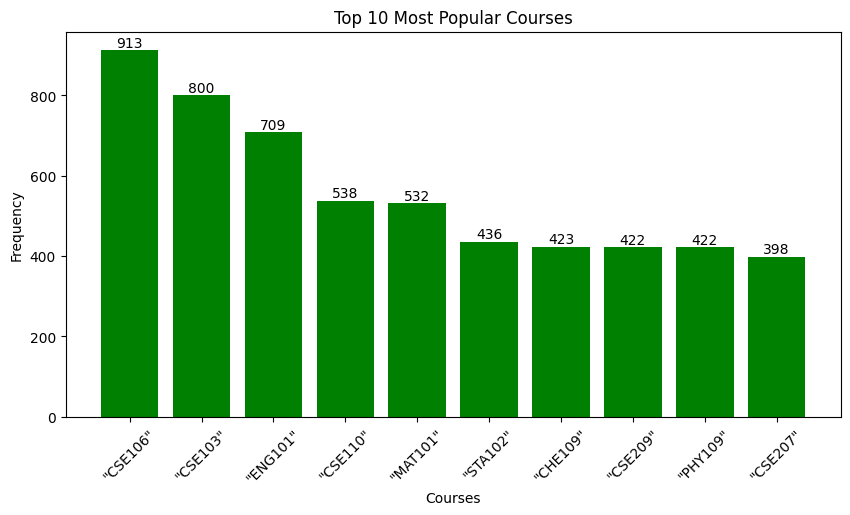

In [ ]:
course_count = spark.read.text("/content/course_frequency_output.txt")
course_count = course_count.rdd.map(lambda x: x[0].split('\t')).collectAsMap()
course_count = {course: int(count) for course, count in course_count.items()}
sorted_courses = dict(sorted(course_count.items(), key=lambda x: x[1], reverse=True))

# Top 10 Most Popular Courses
top_10 = dict(list(sorted_courses.items())[:10])  # First 10 most popular
plt.figure(figsize=(10, 5))
bars = plt.bar(top_10.keys(), top_10.values(), color='green')
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Courses")
plt.xlabel("Courses")
plt.ylabel("Frequency")

# Add frequency labels above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.show()

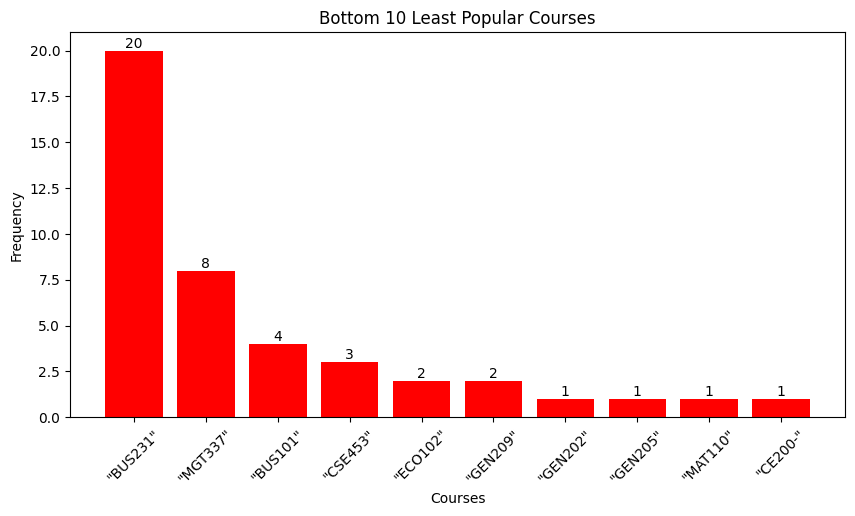

In [ ]:
# Bottom 10 Least Popular Courses
bottom_10 = dict(list(sorted_courses.items())[-10:])  # Last 10 least popular
plt.figure(figsize=(10, 5))
bars = plt.bar(bottom_10.keys(), bottom_10.values(), color='red')
plt.xticks(rotation=45)
plt.title("Bottom 10 Least Popular Courses")
plt.xlabel("Courses")
plt.ylabel("Frequency")

# Add frequency labels above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.show()

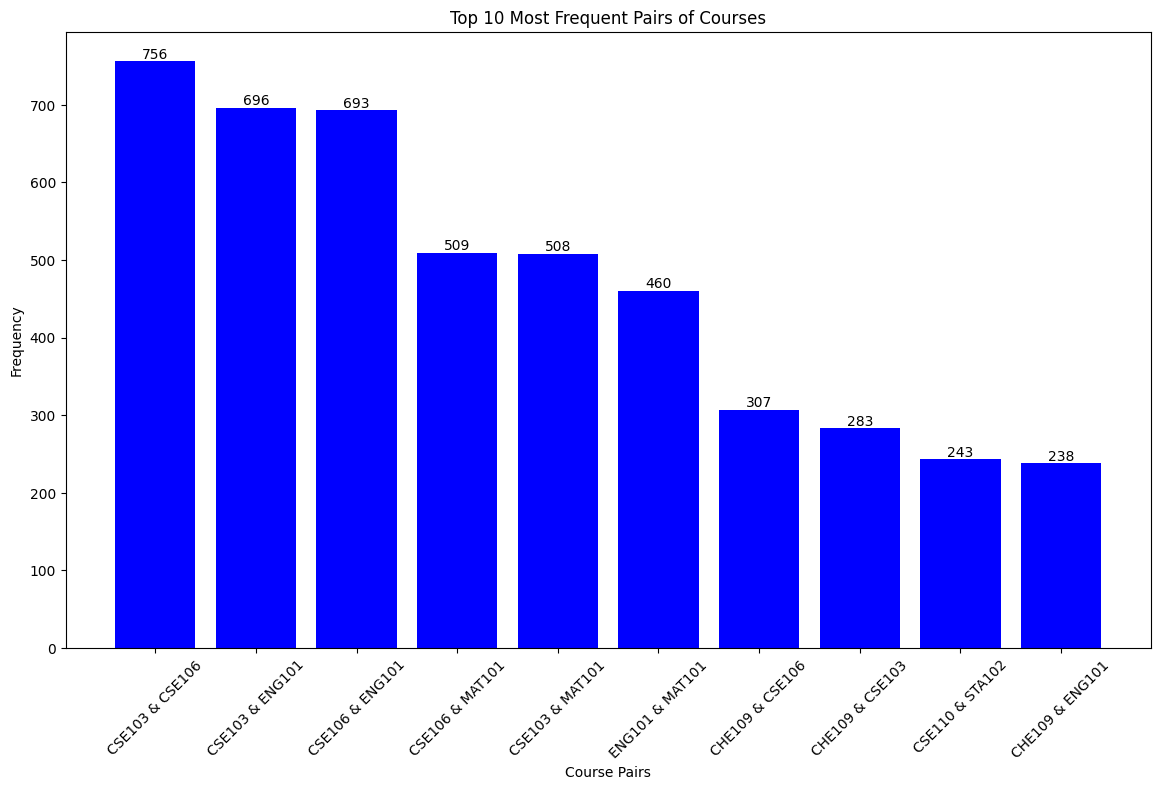

In [ ]:
top_pairs = dict(sorted_pairs[:10])  # Get top 10 pairs
plt.figure(figsize=(14, 8))
bars = plt.bar([" & ".join(pair) for pair in top_pairs.keys()], top_pairs.values(), color='blue')
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Pairs of Courses")
plt.xlabel("Course Pairs")
plt.ylabel("Frequency")

# Add frequency labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.show()

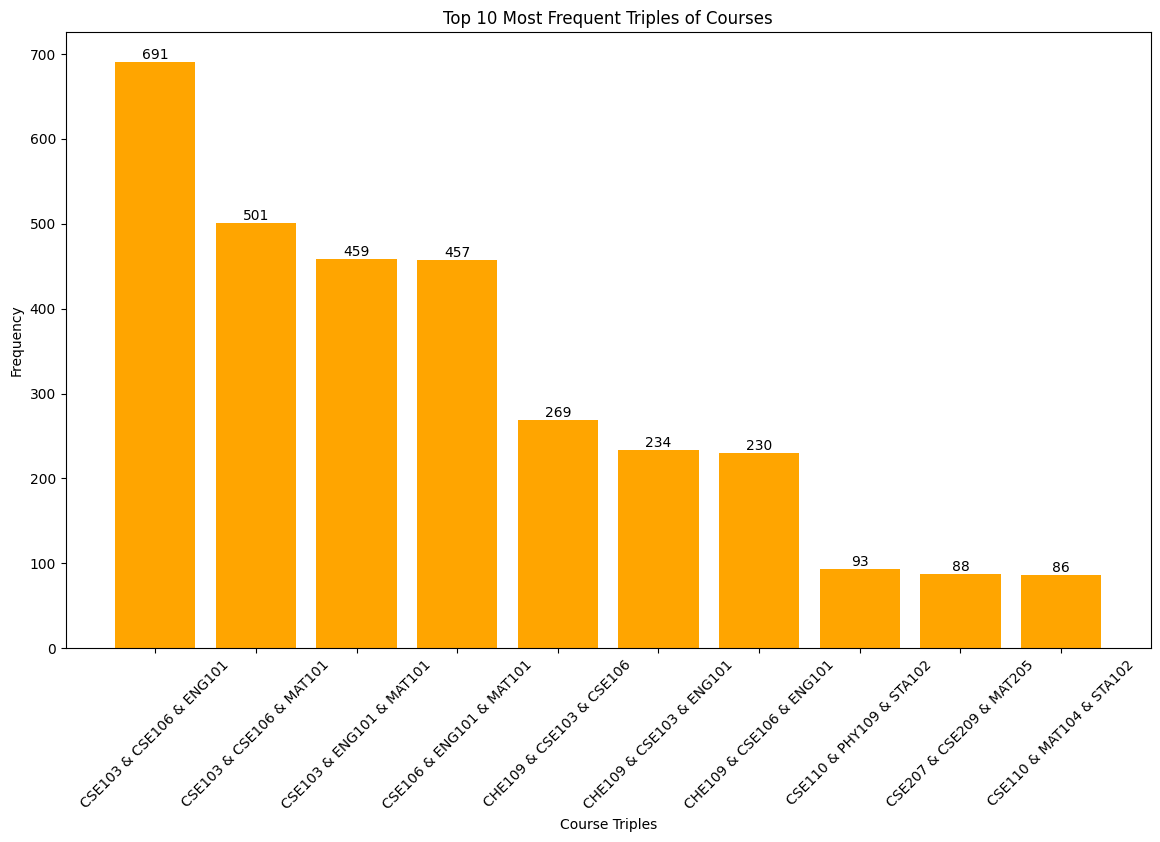

In [ ]:
# Top 10 triples
top_triples = dict(sorted_triples[:10])  # Get top 10 triples
plt.figure(figsize=(14, 8))
bars = plt.bar([" & ".join(triple) for triple in top_triples.keys()], top_triples.values(), color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Triples of Courses")
plt.xlabel("Course Triples")
plt.ylabel("Frequency")

# Add frequency labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.show()

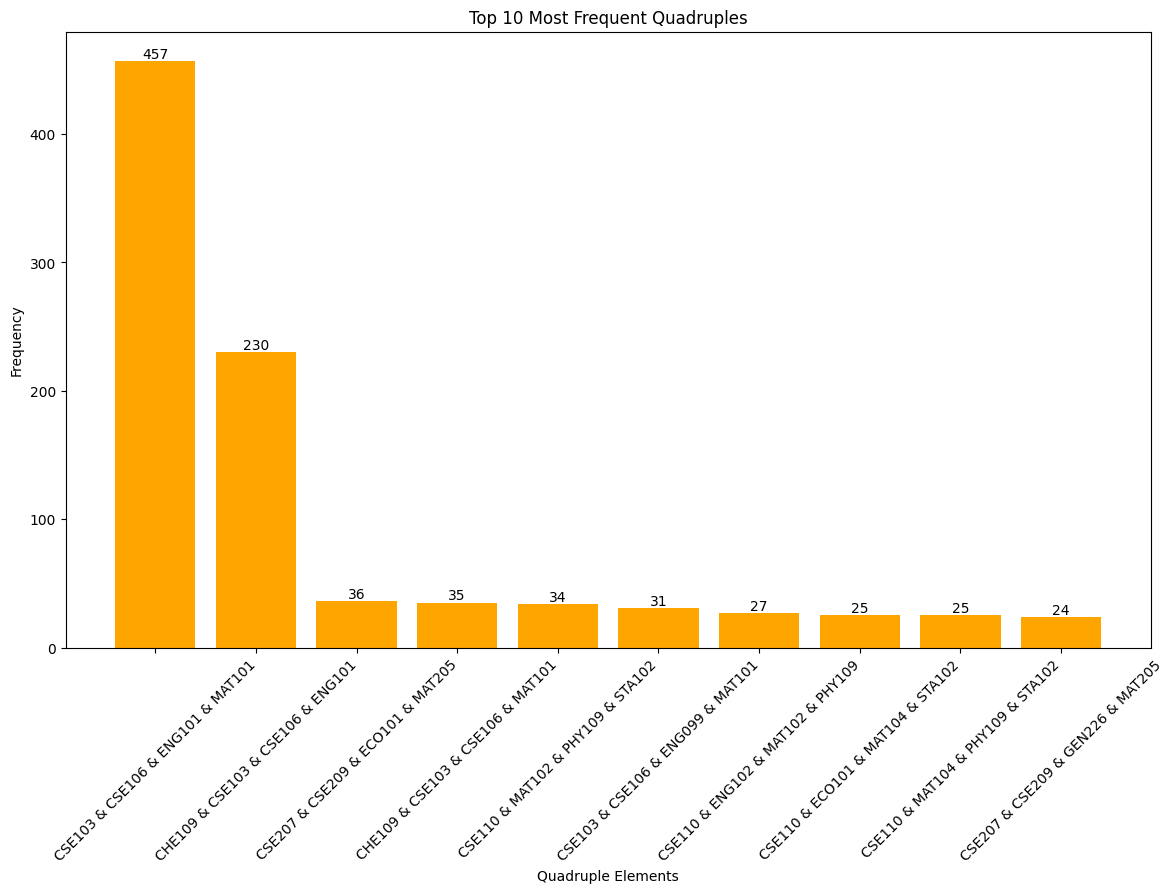

In [ ]:
import matplotlib.pyplot as plt

# Top 10 Quadruples
top_quadruples = dict(sorted_Quadruple[:10])  # Get top 10 quadruples

# Create a bar chart for the top 10 quadruples
plt.figure(figsize=(14, 8))
bars = plt.bar([" & ".join(map(str, quadruple)) for quadruple in top_quadruples.keys()], top_quadruples.values(), color='orange')

# Rotate the x-axis labels to fit
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Quadruples")
plt.xlabel("Quadruple Elements")
plt.ylabel("Frequency")

# Add frequency labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

plt.show()

### 5. Combination Patterns:
* Use a heatmap or chord diagram to visualize the relationships between courses frequently taken together.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the pairs_output.txt file
pairs_data = []
with open('pairs_output.txt', 'r') as file:
    for line in file:
        pair, count = line.strip().split('\t')
        pair = eval(pair)  # Convert string representation of list to actual list
        count = int(count)  # Convert count to integer
        pairs_data.append((pair[0], pair[1], count))

# Convert to Pandas DataFrame
pairs_df = pd.DataFrame(pairs_data, columns=["Course1", "Course2", "Frequency"])

# Filter rows with Frequency >= 2
filtered_pairs_df = pairs_df[pairs_df["Frequency"] >= 4]
print(f"Filtered DataFrame:\n{filtered_pairs_df.head()}")

import plotly.graph_objects as go

# Prepare data for the chord diagram
labels = list(set(filtered_pairs_df['Course1']).union(set(filtered_pairs_df['Course2'])))
source = [labels.index(row.Course1) for _, row in filtered_pairs_df.iterrows()]
target = [labels.index(row.Course2) for _, row in filtered_pairs_df.iterrows()]
value = filtered_pairs_df['Frequency']

# Create the chord diagram
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Update layout
fig.update_layout(title_text="Chord Diagram of Course Combinations (Frequency ≥ 4)", font_size=12)
fig.show()



Filtered DataFrame:
  Course1 Course2  Frequency
0  CSE106  MAT102         64
1  CSE106  MAT104         58
2  CSE106  MAT205         11
4  CSE106  PHY109         97
5  CSE106  PHY209          9


### 6. Credits Distribution:
* Plot a histogram for the distribution of CreditsCompleted and takencredit.

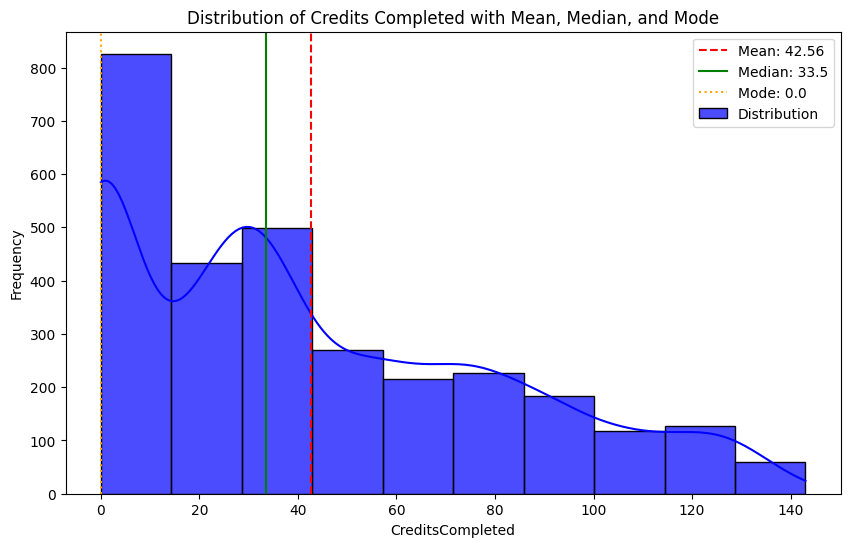

In [ ]:
# Calculate statistics
mean = data['CreditsCompleted'].mean()
median = data['CreditsCompleted'].median()
mode = data['CreditsCompleted'].mode()[0]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['CreditsCompleted'], bins=10, kde=True, color='blue', alpha=0.7, label='Distribution')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median}')
plt.axvline(mode, color='orange', linestyle=':', label=f'Mode: {mode}')
plt.title("Distribution of Credits Completed with Mean, Median, and Mode")
plt.xlabel("CreditsCompleted")
plt.ylabel("Frequency")
plt.legend()
plt.show()

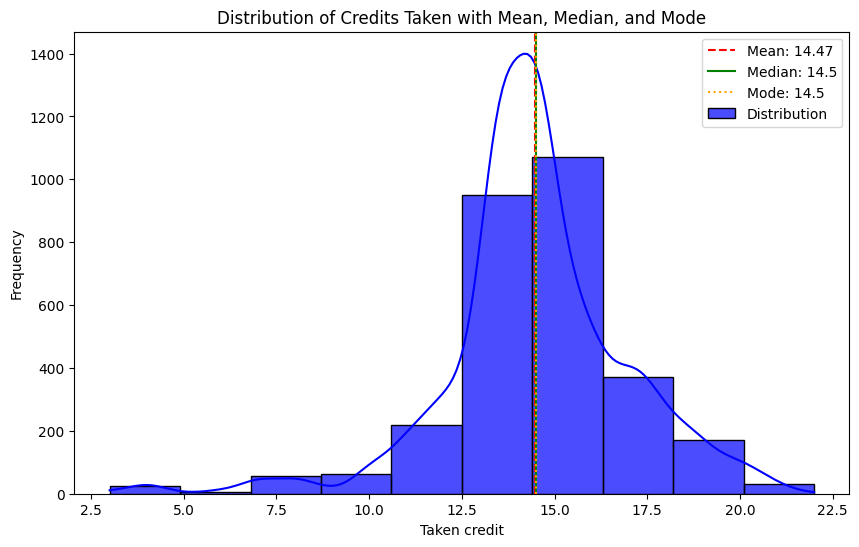

In [ ]:
# Calculate statistics
mean = data['takencredit'].mean()
median = data['takencredit'].median()
mode = data['takencredit'].mode()[0]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['takencredit'], bins=10, kde=True, color='blue', alpha=0.7, label='Distribution')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median}')
plt.axvline(mode, color='orange', linestyle=':', label=f'Mode: {mode}')
plt.title("Distribution of Credits Taken with Mean, Median, and Mode")
plt.xlabel("Taken credit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 7. Course Co-occurrence:
* Create a network graph to display courses that are frequently taken together.

Filtered DataFrame:
  Course1 Course2  Frequency
0  CSE106  MAT102         64
1  CSE106  MAT104         58
2  CSE106  MAT205         11
4  CSE106  PHY109         97
6  CSE106  STA102         52


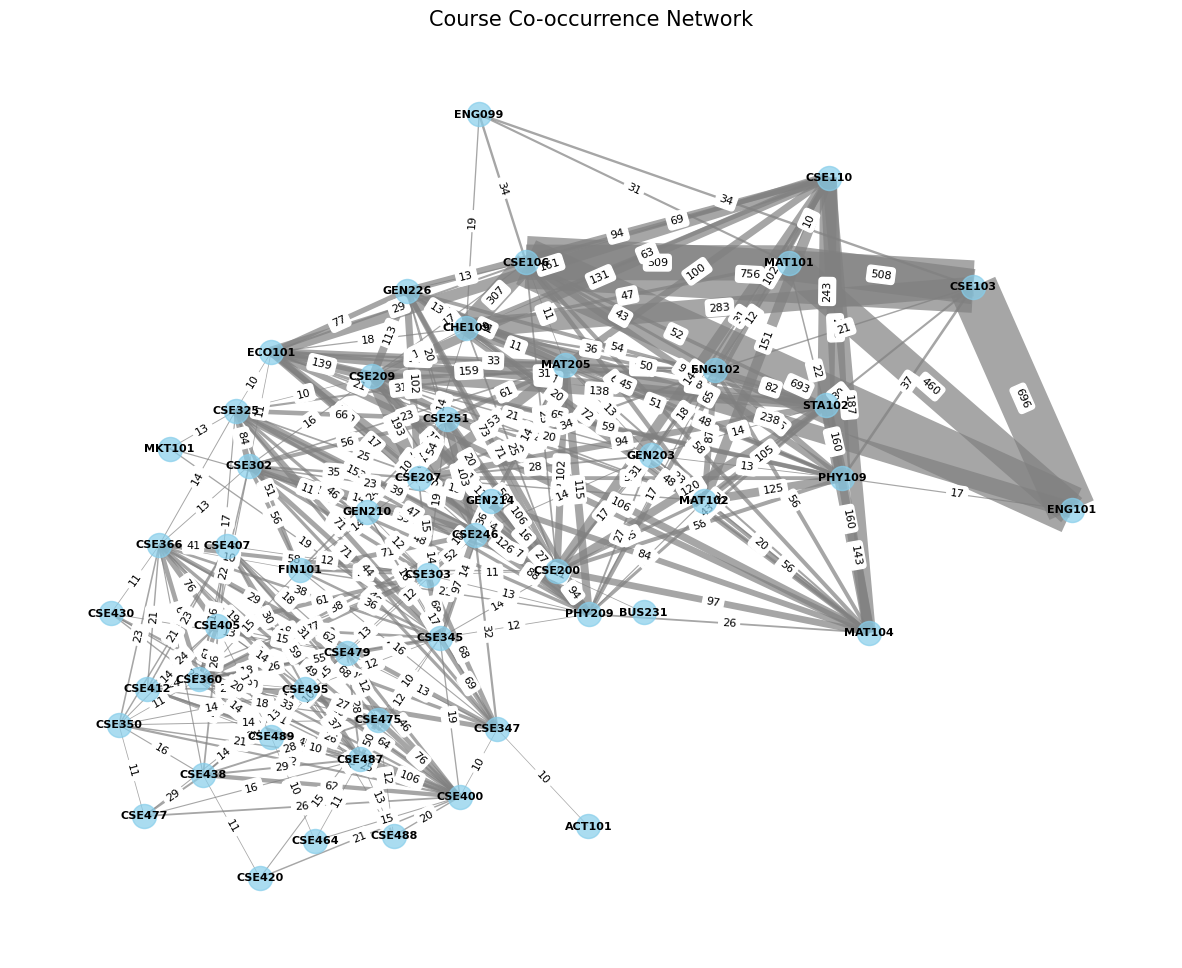

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the pairs_output.txt file
pairs_data = []
with open('pairs_output.txt', 'r') as file:
    for line in file:
        pair, count = line.strip().split('\t')
        pair = eval(pair)  # Convert string representation of list to actual list
        count = int(count)  # Convert count to integer
        pairs_data.append((pair[0], pair[1], count))

# Convert to Pandas DataFrame
df = pd.DataFrame(pairs_data, columns=["Course1", "Course2", "Frequency"])

# Filter rows with Frequency >= 10
df = df[df["Frequency"] >= 10]
print(f"Filtered DataFrame:\n{df.head()}")

# Create a graph
G = nx.Graph()

# Add edges to the graph with weights
for _, row in df.iterrows():
    G.add_edge(row["Course1"], row["Course2"], weight=row["Frequency"])

# Remove isolated nodes (nodes with no edges)
G.remove_nodes_from(list(nx.isolates(G)))

# Draw the graph
plt.figure(figsize=(15, 12))

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=300, alpha=0.7)

# Draw edges with thickness proportional to the weight
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] / 20 for _, _, d in edges], alpha=0.7, edge_color='gray')

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')

# Add edge labels to display weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Title and display
plt.title("Course Co-occurrence Network", fontsize=15)
plt.axis('off')
plt.show()

# Predictive Analytics

### 8. Association Rule Mining:
* Use algorithms like Apriori to generate association rules and find confidence/support for course combinations (pairs, triples and so on).

In [ ]:
from pyspark.ml.fpm import FPGrowth

spark = SparkSession.builder.appName("FPGrowth Pairs").getOrCreate()
data_csv = spark.read.csv('/content/Course_Advising_shuffled_file.csv', header=True, inferSchema=True)

# Fill missing course values with empty strings
data_csv = data_csv.fillna("")

# Combine course columns into a single array and ensure unique items
transactions = data_csv.select(array_distinct(array("C1", "C2", "C3", "C4", "C5", "C6", "C7")).alias("courses"))

# Remove empty strings from transactions
transactions = transactions.selectExpr("filter(courses, x -> x != '') as courses")

# Apply FPGrowth with minimum support and confidence
fp_growth = FPGrowth(itemsCol="courses", minSupport=0.1, minConfidence=0.5)
model = fp_growth.fit(transactions)

# Filter association rules for pairs (size of the antecedent and consequent should be 1)
pair_rules = model.associationRules.filter(size(col("antecedent")) == 1).filter(size(col("consequent")) == 1)

# Sort the rules by confidence and support
sorted_rules = pair_rules.orderBy(col("confidence").desc(), col("support").desc())

# Show the top 20 pairs with their support and confidence
print("Top Pairs Association Rules:")
sorted_rules.select("antecedent", "consequent", "support", "confidence").show(20, truncate=False)


Top Pairs Association Rules:
+----------+----------+-------------------+------------------+
|antecedent|consequent|support            |confidence        |
+----------+----------+-------------------+------------------+
|[ENG101]  |[CSE103]  |0.23513513513513515|0.9816643159379408|
|[ENG101]  |[CSE106]  |0.23412162162162162|0.9774330042313117|
|[MAT101]  |[CSE106]  |0.17195945945945945|0.956766917293233 |
|[MAT101]  |[CSE103]  |0.17162162162162162|0.9548872180451128|
|[CSE103]  |[CSE106]  |0.2554054054054054 |0.945             |
|[CSE103]  |[ENG101]  |0.23513513513513515|0.87              |
|[MAT101]  |[ENG101]  |0.1554054054054054 |0.8646616541353384|
|[CSE106]  |[CSE103]  |0.2554054054054054 |0.828039430449069 |
|[CSE106]  |[ENG101]  |0.23412162162162162|0.7590361445783133|
|[CHE109]  |[CSE106]  |0.10371621621621621|0.7257683215130024|
|[ENG101]  |[MAT101]  |0.1554054054054054 |0.6488011283497884|
|[CSE103]  |[MAT101]  |0.17162162162162162|0.635             |
|[CSE106]  |[MAT101]  |0.1

In [ ]:
model = fp_growth.fit(transactions)

triple_rules = model.associationRules.filter(
    (size(col("antecedent")) == 2) & (size(col("consequent")) == 1) |
    (size(col("antecedent")) == 1) & (size(col("consequent")) == 2)
)

sorted_triple_rules = triple_rules.orderBy(col("confidence").desc(), col("support").desc())

print("Top Triples Association Rules:")
sorted_triple_rules.select("antecedent", "consequent", "support", "confidence").show(20, truncate=False)


Top Triples Association Rules:
+----------------+----------+-------------------+------------------+
|antecedent      |consequent|support            |confidence        |
+----------------+----------+-------------------+------------------+
|[MAT101, ENG101]|[CSE103]  |0.15506756756756757|0.9978260869565218|
|[ENG101, CSE106]|[CSE103]  |0.23344594594594595|0.9971139971139971|
|[MAT101, ENG101]|[CSE106]  |0.1543918918918919 |0.9934782608695653|
|[ENG101, CSE103]|[CSE106]  |0.23344594594594595|0.992816091954023 |
|[MAT101, CSE103]|[CSE106]  |0.16925675675675675|0.9862204724409449|
|[MAT101, CSE106]|[CSE103]  |0.16925675675675675|0.9842829076620825|
|[CSE103, CSE106]|[ENG101]  |0.23344594594594595|0.9140211640211641|
|[MAT101, CSE103]|[ENG101]  |0.15506756756756757|0.9035433070866141|
|[MAT101, CSE106]|[ENG101]  |0.1543918918918919 |0.8978388998035364|
|[CSE103, CSE106]|[MAT101]  |0.16925675675675675|0.6626984126984127|
|[ENG101, CSE103]|[MAT101]  |0.15506756756756757|0.6594827586206896|
|[E

In [ ]:
fp_growth = FPGrowth(itemsCol="courses", minSupport=0.1, minConfidence=0.5)
model = fp_growth.fit(transactions)

triple_rules = model.associationRules.filter(
    (size(col("antecedent")) == 2) & (size(col("consequent")) == 1) |
    (size(col("antecedent")) == 1) & (size(col("consequent")) == 2)
)

sorted_triple_rules = triple_rules.orderBy(col("confidence").desc(), col("support").desc())

print("Top Triples Association Rules:")
sorted_triple_rules.select("antecedent", "consequent", "support", "confidence").show(20, truncate=False)


Top Triples Association Rules:
+----------------+----------+-------------------+------------------+
|antecedent      |consequent|support            |confidence        |
+----------------+----------+-------------------+------------------+
|[MAT101, ENG101]|[CSE103]  |0.15506756756756757|0.9978260869565218|
|[ENG101, CSE106]|[CSE103]  |0.23344594594594595|0.9971139971139971|
|[MAT101, ENG101]|[CSE106]  |0.1543918918918919 |0.9934782608695653|
|[ENG101, CSE103]|[CSE106]  |0.23344594594594595|0.992816091954023 |
|[MAT101, CSE103]|[CSE106]  |0.16925675675675675|0.9862204724409449|
|[MAT101, CSE106]|[CSE103]  |0.16925675675675675|0.9842829076620825|
|[CSE103, CSE106]|[ENG101]  |0.23344594594594595|0.9140211640211641|
|[MAT101, CSE103]|[ENG101]  |0.15506756756756757|0.9035433070866141|
|[MAT101, CSE106]|[ENG101]  |0.1543918918918919 |0.8978388998035364|
|[CSE103, CSE106]|[MAT101]  |0.16925675675675675|0.6626984126984127|
|[ENG101, CSE103]|[MAT101]  |0.15506756756756757|0.6594827586206896|
|[E

In [ ]:
fp_growth = FPGrowth(itemsCol="courses", minSupport=0.1, minConfidence=0.5)
model = fp_growth.fit(transactions)

quadruple_rules = model.associationRules.filter(
    (size(col("antecedent")) == 3) & (size(col("consequent")) == 1) |
    (size(col("antecedent")) == 1) & (size(col("consequent")) == 3) |
    (size(col("antecedent")) == 2) & (size(col("consequent")) == 2)
)

sorted_quadruple_rules = quadruple_rules.orderBy(col("confidence").desc(), col("support").desc())

print("Top Quadruples Association Rules:")
sorted_quadruple_rules.select("antecedent", "consequent", "support", "confidence").show(20, truncate=False)


Top Quadruples Association Rules:
+------------------------+----------+------------------+------------------+
|antecedent              |consequent|support           |confidence        |
+------------------------+----------+------------------+------------------+
|[MAT101, ENG101, CSE106]|[CSE103]  |0.1543918918918919|1.0               |
|[MAT101, ENG101, CSE103]|[CSE106]  |0.1543918918918919|0.9956427015250545|
|[MAT101, CSE103, CSE106]|[ENG101]  |0.1543918918918919|0.9121756487025948|
|[ENG101, CSE103, CSE106]|[MAT101]  |0.1543918918918919|0.6613603473227206|
+------------------------+----------+------------------+------------------+



### 9. Clustering:
* Group students based on the courses they take (e.g., using K-means or hierarchical clustering).

In [ ]:
# Load the dataset
data_csv = spark.read.csv('/content/Course_Advising_shuffled_file.csv', header=True, inferSchema=True)

# Combine course columns into an array
course_columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]
data_csv = data_csv.fillna('None', subset=course_columns)
data_csv = data_csv.withColumn("courses", array(*[col(c) for c in course_columns]))

# Remove duplicate courses in each student's list
data_csv = data_csv.withColumn("courses", array_distinct(col("courses")))


In [ ]:
from pyspark.ml.feature import CountVectorizer

# Convert courses array into a feature vector
vectorizer = CountVectorizer(inputCol="courses", outputCol="features")
vectorized_model = vectorizer.fit(data_csv)
data_csv = vectorized_model.transform(data_csv)

# Show vectorized data
#data_csv.select("StudentId", "features").show(truncate=False)


In [ ]:
from pyspark.ml.clustering import KMeans

# Apply K-Means clustering
kmeans = KMeans(featuresCol="features", predictionCol="cluster", k=4, seed=42)
model = kmeans.fit(data_csv)

# Assign clusters to each student
clustered_data = model.transform(data_csv)

# Show students with their cluster assignments
clustered_data.select("StudentId", "courses", "cluster").show(truncate=False)
# Show the last 20 rows of the clustered data
clustered_data.orderBy("StudentId", ascending=False).select("StudentId", "courses", "cluster").show(20, truncate=False)


+---------+----------------------------------------------+-------+
|StudentId|courses                                       |cluster|
+---------+----------------------------------------------+-------+
|1        |[CSE110, ECO101, MAT205, PHY109, None]        |1      |
|2        |[CSE207, CSE209, MAT205, PHY209, None]        |2      |
|3        |[CSE110, ENG102, MAT102, MAT104, PHY109, None]|1      |
|4        |[CSE110, GEN203, MAT101, MAT205, None]        |1      |
|5        |[CSE303, None]                                |3      |
|6        |[CHE109, CSE103, CSE106, ENG101, None]        |0      |
|7        |[CSE110, ECO101, MAT104, STA102, CSE209, None]|1      |
|8        |[CSE347, CSE405, CSE303, CSE366, None]        |3      |
|9        |[CSE110, CSE209, ECO101, GEN226, PHY109, None]|1      |
|10       |[CSE110, CSE200, GEN226, PHY109, None]        |1      |
|11       |[CSE246, CSE302, CSE325, FIN101, None]        |3      |
|12       |[CHE109, CSE103, CSE106, ENG101, None]        |0   

# Advanced Analytics

### 10. Recommendation System:

Design a simple recommender system for students to suggest courses based on previously taken courses.

In [ ]:
from pyspark.sql.functions import col, array, collect_list, expr

# Combine course columns into a single array
course_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
f_courses = courses.withColumn("course", array(*[col(c) for c in course_columns]))

# Remove null values from the courses array using the SQL expression
f_courses = f_courses.withColumn("course", expr("filter(course, x -> x IS NOT NULL AND x != 'NaN')"))
f_courses.show(truncate=False)


+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+----------------------------------------+
|StudentId|CreditsCompleted|takencredit|takennocourse|C1    |C2    |C3    |C4    |C5    |C6 |C7 |course                                  |
+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+----------------------------------------+
|1        |29.5            |14.5       |4            |CSE110|ECO101|MAT205|PHY109|NaN   |NaN|NaN|[CSE110, ECO101, MAT205, PHY109]        |
|2        |41.0            |14.0       |4            |CSE207|CSE209|MAT205|PHY209|NaN   |NaN|NaN|[CSE207, CSE209, MAT205, PHY209]        |
|3        |17.5            |17.5       |5            |CSE110|ENG102|MAT102|MAT104|PHY109|NaN|NaN|[CSE110, ENG102, MAT102, MAT104, PHY109]|
|4        |44.5            |13.5       |4            |CSE110|GEN203|MAT101|MAT205|NaN   |NaN|NaN|[CSE110, GEN203, MAT101, MAT205]        |
|5        |82.0            

In [ ]:
from pyspark.ml.fpm import FPGrowth

# Train FP-Growth model
fpGrowth = FPGrowth(itemsCol="course", minSupport=0, minConfidence=.20)
model = fpGrowth.fit(f_courses)

# Show frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.sort('freq', ascending=False).show(5,truncate=False)

# Show association rules
print("Association Rules:")
association_rules = model.associationRules.orderBy('confidence', ascending=False)
association_rules.show(5,truncate=False)

# Show predictions for students
print("Predictions:")
prediction=model.transform(f_courses).orderBy("studentId")
prediction.select("studentID", "CreditsCompleted", "course", "prediction").show(5,truncate=False)

Frequent Itemsets:
+----------------+----+
|items           |freq|
+----------------+----+
|[CSE106]        |913 |
|[CSE103]        |800 |
|[CSE103, CSE106]|756 |
|[ENG101]        |709 |
|[ENG101, CSE103]|696 |
+----------------+----+
only showing top 5 rows

Association Rules:
+--------------------------------+----------+----------+------------------+---------------------+
|antecedent                      |consequent|confidence|lift              |support              |
+--------------------------------+----------+----------+------------------+---------------------+
|[CSE405, CSE345, MAT102]        |[CSE489]  |1.0       |51.92982456140351 |3.3783783783783786E-4|
|[CSE420, CSE475, CSE438, CSE345]|[CSE360]  |1.0       |14.874371859296485|3.3783783783783786E-4|
|[MKT101, PHY209, CSE246, CSE209]|[GEN226]  |1.0       |11.607843137254903|3.3783783783783786E-4|
|[CSE412, CSE495, CSE303, CSE246]|[CSE325]  |1.0       |11.653543307086615|3.3783783783783786E-4|
|[CSE405, CSE345, MAT102]        |[

In [ ]:
prediction.select("studentID", "CreditsCompleted", "course", "prediction").sort("CreditsCompleted").show(truncate=False)

+---------+----------------+----------------------------------------+----------------+
|studentID|CreditsCompleted|course                                  |prediction      |
+---------+----------------+----------------------------------------+----------------+
|96       |0.0             |[CHE109, CSE103, CSE106, ENG101]        |[MAT101]        |
|1068     |0.0             |[CSE103, CSE106, ENG101, MAT101]        |[CHE109]        |
|141      |0.0             |[CSE103, CSE106, ENG101, MAT101]        |[CHE109]        |
|1047     |0.0             |[CHE109, CSE103, CSE106, ENG101]        |[MAT101]        |
|97       |0.0             |[CHE109, CSE103, CSE106, ENG101]        |[MAT101]        |
|1069     |0.0             |[CSE103, CSE106, ENG101, MAT101]        |[CHE109]        |
|95       |0.0             |[CSE103, CSE106, ENG101, MAT101]        |[CHE109]        |
|1120     |0.0             |[CSE106, ENG101, CSE103, MAT101]        |[CHE109]        |
|6        |0.0             |[CHE109, CSE103

In [ ]:
s_id = input("Enter student ID: ")
s_data = prediction.filter(col("studentID") == s_id).select("studentID", "CreditsCompleted", "takencredit", "course", "prediction").collect()
print(s_data)

Enter student ID: 10
[Row(studentID=10, CreditsCompleted=17.5, takencredit=12.5, course=['CSE110', 'CSE200', 'GEN226', 'PHY109'], prediction=['STA102', 'CSE209', 'MAT104', 'CSE207', 'MAT205', 'ECO101', 'MAT102', 'PHY209', 'CHE109', 'CSE106', 'ENG102'])]


Overview of the student who took courses matched to credit completed with the give student total credit

In [ ]:
s_id_total_credit = s_data[0].CreditsCompleted + s_data[0].takencredit
prediction.createOrReplaceTempView("prediction")
query = f"""
        SELECT StudentId, CreditsCompleted, course
        FROM prediction
        WHERE CreditsCompleted = {s_id_total_credit}
        """
spark.sql(query).show(truncate=False)

+---------+----------------+--------------------------------+
|StudentId|CreditsCompleted|course                          |
+---------+----------------+--------------------------------+
|600      |30.0            |[CSE103, CSE106, ECO101, MAT102]|
+---------+----------------+--------------------------------+



### 11. Comparison:
* Compare the course-taking behavior of students who have taken more than 50 credits vs. those who have taken fewer.

In [ ]:
# Separate students based on CreditsCompleted
more_than_50 = f_courses.filter(col("CreditsCompleted") > 50)
less_than_equal_50 = f_courses.filter(col("CreditsCompleted") <= 50)

# Count distinct courses taken by both groups
more_than_50_courses = more_than_50.selectExpr("explode(course) as course").groupBy("course").count().sort("count",ascending=False)
less_than_equal_50_courses = less_than_equal_50.selectExpr("explode(course) as course").groupBy("course").count().sort("count",ascending=False)

# Display results
print("Courses taken by students with more than 50 credits:")
more_than_50_courses.select("course", "count").show(truncate=False)
# more_than_50_courses.orderBy(col("count").desc()).show(truncate=False)

print("Courses taken by students with 50 or fewer credits:")
less_than_equal_50_courses.orderBy(col("count").desc()).show(truncate=False)


Courses taken by students with more than 50 credits:
+------+-----+
|course|count|
+------+-----+
|CSE246|319  |
|CSE345|257  |
|CSE302|251  |
|CSE325|241  |
|CSE303|233  |
|CSE400|212  |
|CSE347|202  |
|CSE360|199  |
|CSE366|198  |
|CSE251|182  |
|CSE405|169  |
|CSE487|149  |
|PHY209|129  |
|FIN101|121  |
|CSE495|113  |
|CSE407|104  |
|CSE438|101  |
|CSE412|100  |
|CSE479|99   |
|CSE475|94   |
+------+-----+
only showing top 20 rows

Courses taken by students with 50 or fewer credits:
+------+-----+
|course|count|
+------+-----+
|CSE106|898  |
|CSE103|790  |
|ENG101|707  |
|CSE110|532  |
|MAT101|527  |
|STA102|430  |
|CHE109|421  |
|PHY109|412  |
|CSE209|402  |
|MAT104|363  |
|ECO101|331  |
|CSE207|329  |
|CSE200|302  |
|MAT205|292  |
|MAT102|267  |
|GEN226|235  |
|PHY209|223  |
|ENG102|206  |
|GEN203|69   |
|CSE251|44   |
+------+-----+
only showing top 20 rows



In [ ]:
df_more = more_than_50_courses.toPandas()
df_less = less_than_equal_50_courses.toPandas()

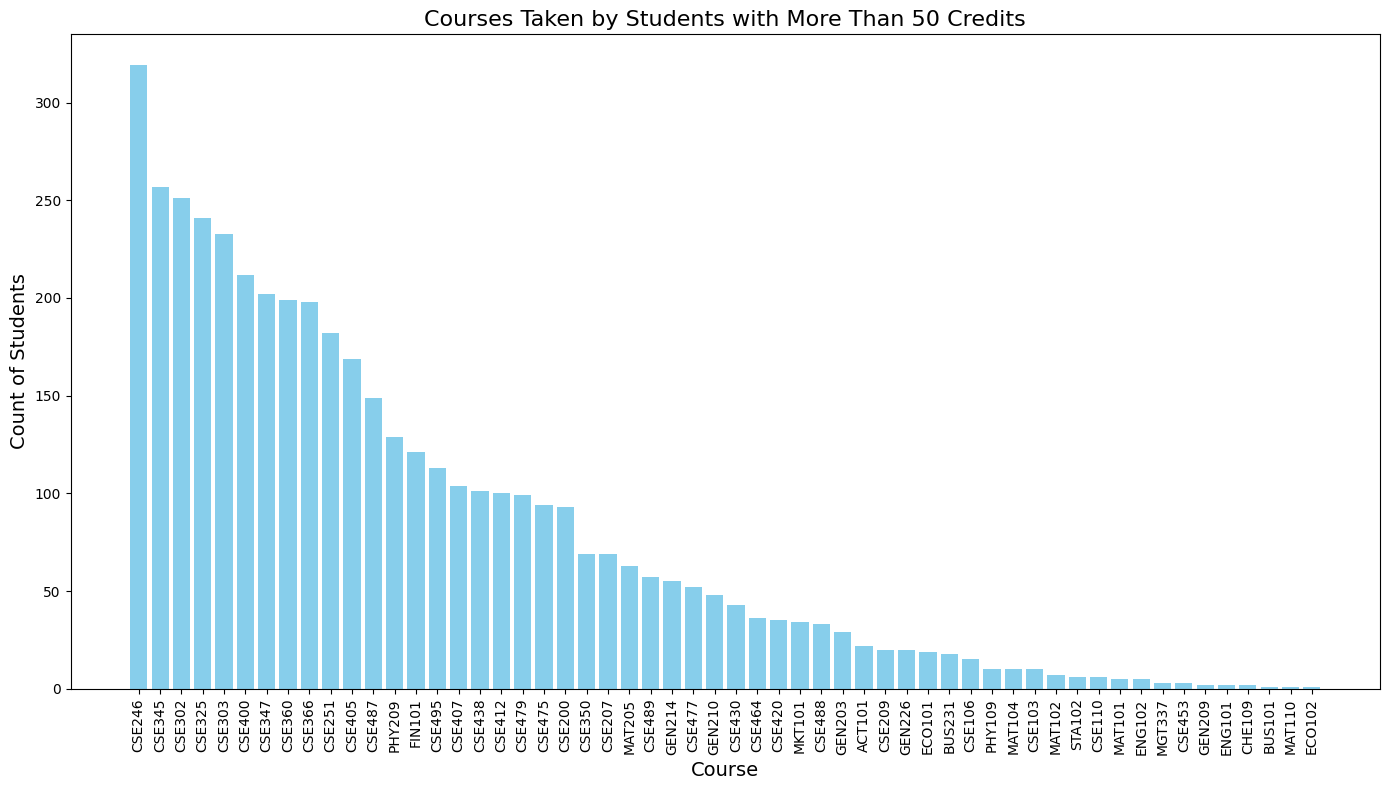

In [ ]:
# Plot for Courses Taken by Students with More than 50 Credits
plt.figure(figsize=(14, 8))
plt.bar(df_more['course'],df_more['count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Courses Taken by Students with More Than 50 Credits', fontsize=16)
plt.xlabel('Course', fontsize=14)
plt.ylabel('Count of Students', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

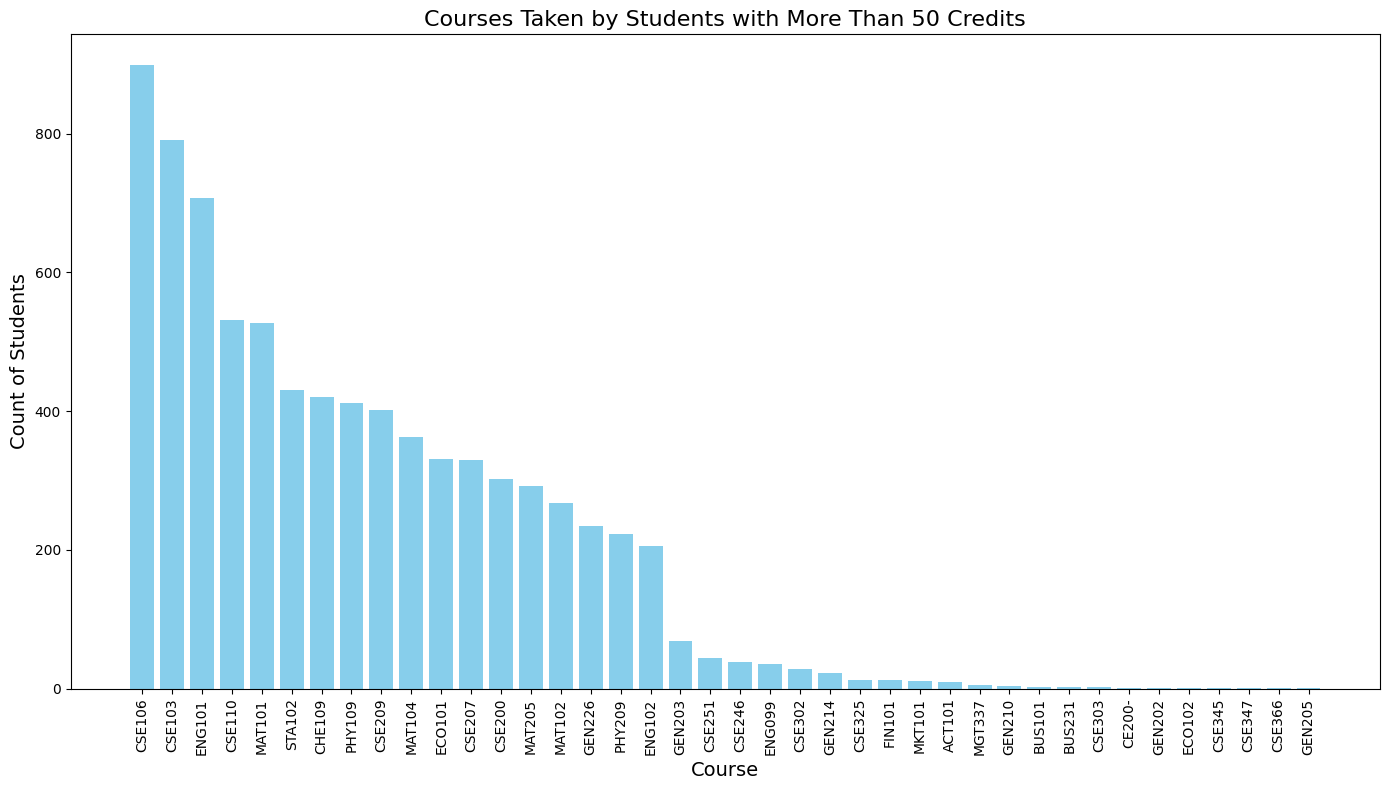

In [ ]:
# Plot for Courses Taken by Students with More than 50 Credits
plt.figure(figsize=(14, 8))
plt.bar(df_less['course'],df_less['count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Courses Taken by Students with More Than 50 Credits', fontsize=16)
plt.xlabel('Course', fontsize=14)
plt.ylabel('Count of Students', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

# Creative and Open-Ended Projects

### 12. Student Profiles:
* Create visual profiles for students based on their CreditsCompleted, takencredit, and course combinations.

In [ ]:
prediction.show(1)

+---------+----------------+-----------+-------------+------+------+------+------+---+---+---+--------------------+--------------------+
|StudentId|CreditsCompleted|takencredit|takennocourse|    C1|    C2|    C3|    C4| C5| C6| C7|              course|          prediction|
+---------+----------------+-----------+-------------+------+------+------+------+---+---+---+--------------------+--------------------+
|        1|            29.5|       14.5|            4|CSE110|ECO101|MAT205|PHY109|NaN|NaN|NaN|[CSE110, ECO101, ...|[ENG102, STA102, ...|
+---------+----------------+-----------+-------------+------+------+------+------+---+---+---+--------------------+--------------------+
only showing top 1 row



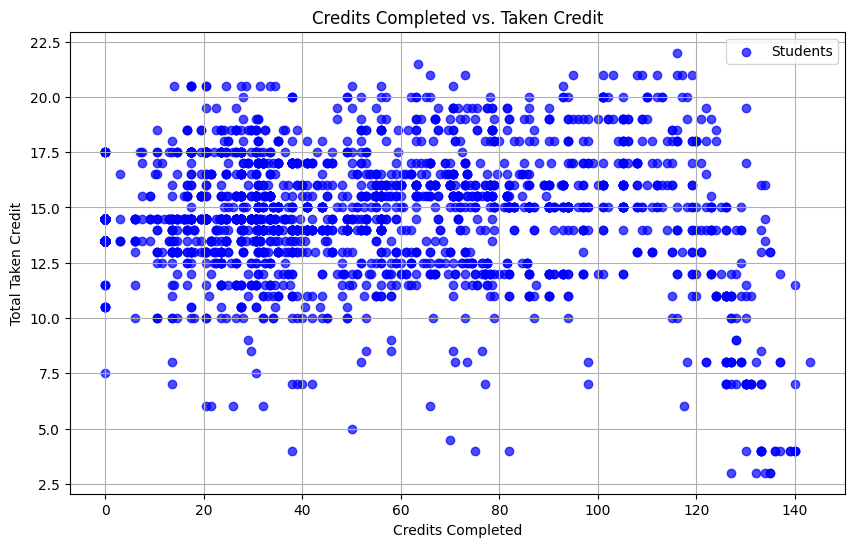

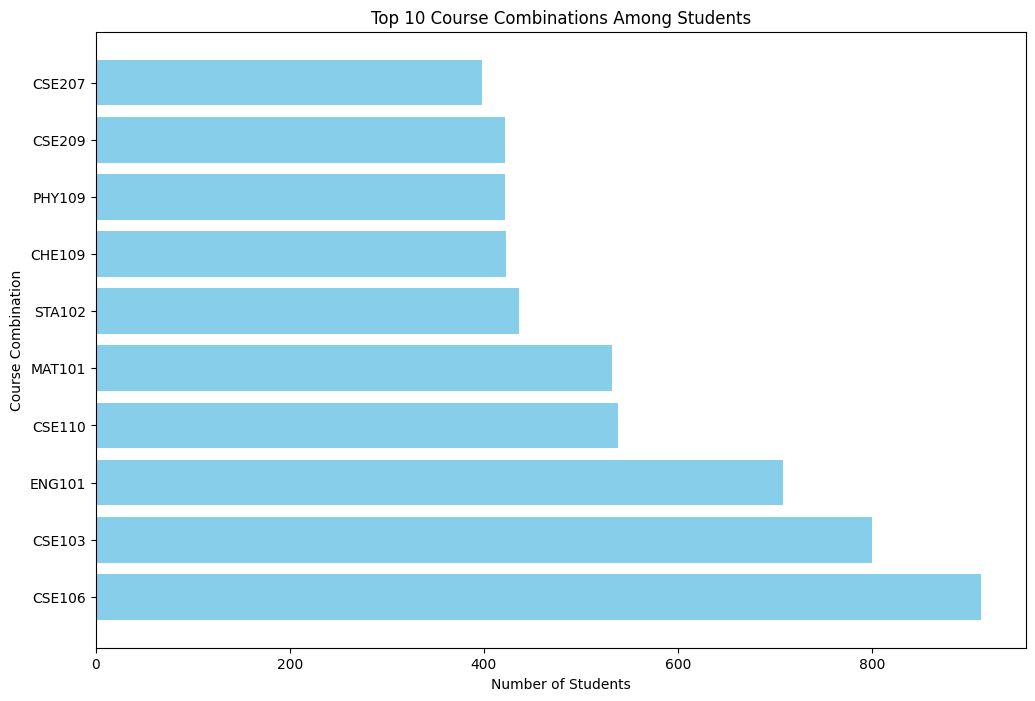

In [ ]:
from pyspark.sql.functions import count
credits_data = prediction.select("studentID", "CreditsCompleted", "takencredit", "course").toPandas()

course_g_data = prediction.withColumn("course", explode("course")) \
                           .groupBy("course") \
                           .agg(count("*").alias("student_count")) \
                           .orderBy(col("student_count").desc()) \
                           .limit(10) \
                           .toPandas()

# Scatter plot:
plt.figure(figsize=(10, 6))
plt.scatter(credits_data['CreditsCompleted'], credits_data['takencredit'], alpha=0.7, c='blue', label='Students')
plt.xlabel('Credits Completed')
plt.ylabel('Total Taken Credit')
plt.title('Credits Completed vs. Taken Credit')
plt.legend()
plt.grid(True)
plt.show()

print()

# Bar plot:
plt.figure(figsize=(12, 8))
plt.barh(course_g_data['course'], course_g_data['student_count'], color='skyblue')
plt.xlabel('Number of Students')
plt.ylabel('Course Combination')
plt.title('Top 10 Course Combinations Among Students')
plt.show()


In [ ]:
from pyspark.sql.functions import col, explode, avg
import plotly.express as px

data = prediction.withColumn("course", explode(col("course")))

# Aggregate CreditsCompleted by course
course_credits = (
    data.groupBy("course")
    .agg(avg("CreditsCompleted").alias("AvgCreditsCompleted"))
    .orderBy(col("AvgCreditsCompleted").desc())
)

# Convert to Pandas for visualization
course_credits_pd = course_credits.toPandas()

# Plot using Plotly
fig = px.bar(
    course_credits_pd,
    x="course",
    y="AvgCreditsCompleted",
    title="Average Credits Completed by Course",
    labels={"course": "Course", "AvgCreditsCompleted": "Average Credits Completed"},
)
fig.update_layout(
    xaxis=dict(title="Course"),
    yaxis=dict(title="Average Credits Completed"),
    showlegend=False
)
fig.show()


In [ ]:
s_id = input("Enter student ID: ")
prediction.filter(col("studentID") == s_id).select("studentID", "CreditsCompleted", "course", "prediction").show(truncate=False)

Enter student ID: 50
+---------+----------------+------------------------+------------------------------------------------------------------------+
|studentID|CreditsCompleted|course                  |prediction                                                              |
+---------+----------------+------------------------+------------------------------------------------------------------------+
|50       |73.0            |[CSE246, CSE302, CSE347]|[CSE325, CSE345, FIN101, PHY209, CSE251, CSE360, CSE405, CSE303, CSE366]|
+---------+----------------+------------------------+------------------------------------------------------------------------+



In [ ]:
s_id = input("Enter student ID: ")
prediction.createOrReplaceTempView("prediction")

query = f"""
        SELECT studentID, CreditsCompleted, course, prediction AS `Suggested Courses`
        FROM prediction
        WHERE studentID = {s_id}
        """
spark.sql(query).show(truncate=False)

Enter student ID: 58
+---------+----------------+--------------------------------+------------------------------------------------------------------------+
|studentID|CreditsCompleted|course                          |Suggested Courses                                                       |
+---------+----------------+--------------------------------+------------------------------------------------------------------------+
|58       |32.0            |[CSE207, STA102, CSE209, MAT205]|[PHY209, CSE200, MAT104, GEN226, ECO101, ENG102, PHY109, MAT102, CSE110]|
+---------+----------------+--------------------------------+------------------------------------------------------------------------+



### 13. Custom Dashboards:
o Build an interactive dashboard using tools like Tableau, Power BI, or Python libraries (Plotly/Dash).

In [ ]:
#python plotly/dash library
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
prediction.show(5, truncate=False)

+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+----------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+
|StudentId|CreditsCompleted|takencredit|takennocourse|C1    |C2    |C3    |C4    |C5    |C6 |C7 |course                                  |prediction                                                                                                                              |
+---------+----------------+-----------+-------------+------+------+------+------+------+---+---+----------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+
|1        |29.5            |14.5       |4            |CSE110|ECO101|MAT205|PHY109|NaN   |NaN|NaN|[CSE110, ECO101, MAT205, PHY109]        |[ENG102, STA102, CSE209, CSE200, M

In [ ]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Student Course Profile Dashboard", style={'text-align': 'center'}),

    # Dropdown to select student ID
    html.Div([
        dcc.Dropdown(
            id='student-id-dropdown',
            options=[{'label': s_id['StudentId'], 'value': s_id['StudentId']} for s_id in spark.sql("SELECT StudentId FROM courses").collect()],
            placeholder="Select a Student ID", style={'width': '50%', 'margin': 'auto'}
        ),
    ], style={'margin-top': '20px', 'text-align': 'center'}),

    # Div to display selected student's profile
    html.Div(
        id='student-profile', style={'margin-top': '20px', 'text-align': 'center'}
    ),

    # Graphs for updates
    html.Div([
        dcc.Graph(id='scatter-credits'),
        dcc.Graph(id='bar-course-combinations'),
        dcc.Graph(id='scatter-course-credits')
    ])
])


# Callback to update student profile and graphs
@app.callback(
    [
        Output('student-profile', 'children'),
        Output('scatter-credits', 'figure'),
        Output('bar-course-combinations', 'figure'),
        Output('scatter-course-credits', 'figure')
    ],
    [Input('student-id-dropdown', 'value')]
)
def update_dashboard(student_id):

    # Student profile
    if student_id:
        profile = [
            html.H3(f"Student ID: {prediction.filter(prediction.StudentId == student_id).select('StudentId').collect()[0]['StudentId']}"),
            html.P(f"Credits Completed: {prediction.filter(prediction.StudentId == student_id).select('CreditsCompleted').collect()[0]['CreditsCompleted']}"),
            html.P(f"Currently Taken Credits: {prediction.filter(prediction.StudentId == student_id).select('takencredit').collect()[0]['takencredit']}"),
            html.P(f"Number of Courses Taken: {prediction.filter(prediction.StudentId == student_id).select('takennocourse').collect()[0]['takennocourse']}"),
            html.P(f"Currently Taken Courses: {prediction.filter(prediction.StudentId == student_id).select('course').collect()[0]['course']}"),
            html.P(f"Suggested Courses: {prediction.filter(prediction.StudentId == student_id).select('prediction').collect()[0]['prediction']}")
        ]
    else:
        profile = html.H3("Select a Student to View Profile")

    data = prediction.toPandas()
    data['course'] = data['course'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x))

    # Scatter plot for CreditsCompleted vs takencredit
    scatter_fig = px.scatter(data, x='CreditsCompleted', y='takencredit', color='course',
                             title='Credits Completed vs Taken Credit',
                             labels={'CreditsCompleted': 'Credits Completed', 'takencredit': 'Total Taken Credit'})

    # Bar plot for top course combinations
    course_counts = data['course'].value_counts().reset_index()
    course_counts.columns = ['course', 'Count']
    bar_fig = px.bar(course_counts.head(10), x='Count', y='course', orientation='h',
                     title='Top 10 Course Combinations',
                     labels={'Count': 'Number of Students', 'course': 'Course Combination'})
    bar_fig.update_layout(yaxis={'categoryorder': 'total ascending'})

    # Scatter plot for course vs. CreditsCompleted
    data = prediction.withColumn("course", explode(col("course"))).select("course", "CreditsCompleted").toPandas()
    scatter_course_credits_fig = px.scatter(
        data,
        x="course",
        y="CreditsCompleted",
        title="Scatter Plot of Course vs. Credits Completed",
        labels={"course": "Course", "CreditsCompleted": "Credits Completed"},
        color="course",
        opacity=0.7
    )
    scatter_course_credits_fig.update_layout(
        xaxis=dict(title="Course"),
        yaxis=dict(title="Credits Completed"),
        showlegend=False
    )

    return profile, scatter_fig, bar_fig, scatter_course_credits_fig


# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>